## First let's start by importing the required libraries

In [403]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

## Now let's import the dataset into a pandas dataframe

In [404]:
df_train=pd.read_csv("train.csv")
df_test=pd.read_csv("test.csv")

In [405]:
df_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


## Combining both the test and train dataframes into a single dataframe

In [406]:
df=pd.concat([df_train,df_test],axis=0).reset_index(drop=True)

In [407]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [408]:
df.shape

(10299, 563)

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.2+ MB


In [410]:
dtypes=df.dtypes.to_dict()
dtypes

{'tBodyAcc-mean()-X': dtype('float64'),
 'tBodyAcc-mean()-Y': dtype('float64'),
 'tBodyAcc-mean()-Z': dtype('float64'),
 'tBodyAcc-std()-X': dtype('float64'),
 'tBodyAcc-std()-Y': dtype('float64'),
 'tBodyAcc-std()-Z': dtype('float64'),
 'tBodyAcc-mad()-X': dtype('float64'),
 'tBodyAcc-mad()-Y': dtype('float64'),
 'tBodyAcc-mad()-Z': dtype('float64'),
 'tBodyAcc-max()-X': dtype('float64'),
 'tBodyAcc-max()-Y': dtype('float64'),
 'tBodyAcc-max()-Z': dtype('float64'),
 'tBodyAcc-min()-X': dtype('float64'),
 'tBodyAcc-min()-Y': dtype('float64'),
 'tBodyAcc-min()-Z': dtype('float64'),
 'tBodyAcc-sma()': dtype('float64'),
 'tBodyAcc-energy()-X': dtype('float64'),
 'tBodyAcc-energy()-Y': dtype('float64'),
 'tBodyAcc-energy()-Z': dtype('float64'),
 'tBodyAcc-iqr()-X': dtype('float64'),
 'tBodyAcc-iqr()-Y': dtype('float64'),
 'tBodyAcc-iqr()-Z': dtype('float64'),
 'tBodyAcc-entropy()-X': dtype('float64'),
 'tBodyAcc-entropy()-Y': dtype('float64'),
 'tBodyAcc-entropy()-Z': dtype('float64'),
 't

## Checking if the dataset contains any null or missing values

In [411]:
null_count=0
for i in df:
    v=df[i].isnull().sum()
    if v > 0:
        print("Column Name: ",i, ", Null Values for this column: ",v,", Percentage of Null values: ",df[i].isnull().sum()/len(df)*100)
        count+=1
if null_count == 0:
    print("There are no missing or null values in the dataset")

There are no missing or null values in the dataset


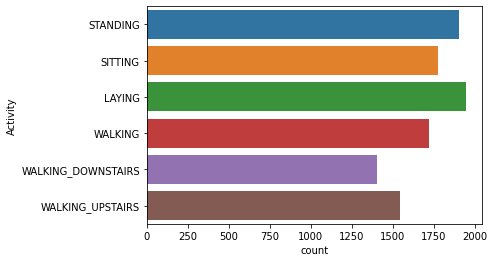

In [412]:
#sns.set_style("darkgrid")
ax=sns.countplot(y=df["Activity"])

## Scaling the data

In [413]:
train=df.drop("Activity",axis=1)

In [414]:
mn=MinMaxScaler()
train_sc=mn.fit_transform(train)

In [415]:
df_final_scaled=pd.DataFrame(train_sc,index=train.index,columns=train.columns)

In [416]:
df_final_scaled.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
0,0.644292,0.489853,0.433547,0.002361,0.008445,0.043237,0.002444,0.008408,0.038236,0.032638,...,0.350662,0.144848,0.443623,0.515200,0.267619,0.490777,0.079377,0.589970,0.470687,0.0
1,0.639209,0.491795,0.438240,0.000877,0.012350,0.019839,0.000596,0.012543,0.021157,0.028466,...,0.202475,0.069250,0.526738,0.496283,0.133687,0.851755,0.077606,0.590144,0.472842,0.0
2,0.639827,0.490266,0.443269,0.002310,0.016406,0.010528,0.001740,0.018166,0.011266,0.030654,...,0.304626,0.119948,0.440720,0.588950,0.550350,0.904265,0.075533,0.590319,0.475441,0.0
3,0.639587,0.486900,0.438359,0.001954,0.008299,0.004662,0.001450,0.008625,0.005349,0.030654,...,0.441355,0.258578,0.481606,0.493554,0.820006,0.257317,0.075675,0.590967,0.476168,0.0
4,0.638314,0.491715,0.442319,0.000931,0.009591,0.004759,0.000839,0.010164,0.004779,0.028765,...,0.324265,0.150397,0.561660,0.561271,0.846789,0.192015,0.076067,0.592576,0.478054,0.0


## Dimensionality Reduction Technique

In [417]:
pca=PCA(n_components=0.9,random_state=0)
df_dimensions_reduced=pca.fit_transform(df_final_scaled)

In [418]:
df_dimensions_reduced

array([[-2.76420318, -0.34761537, -0.71594856, ...,  0.03034757,
         0.06812956, -0.2731899 ],
       [-2.77736184, -0.27900256, -0.9234446 , ...,  0.1522535 ,
        -0.1241077 ,  0.06005617],
       [-2.74493394, -0.13795785, -1.08326037, ..., -0.09783361,
        -0.15831112, -0.26738071],
       ...,
       [ 2.26579835, -0.50252658,  0.24430914, ..., -0.12367479,
         0.15731599, -0.29828858],
       [ 1.86980676, -0.64390489,  0.18781595, ..., -0.15368067,
         0.26606504, -0.13651417],
       [ 1.98217089, -0.52993564,  0.12431779, ..., -0.06551214,
         0.18034141,  0.05214498]])

In [419]:
pca.explained_variance_ratio_

array([0.61823437, 0.04742488, 0.03992737, 0.01817726, 0.01603534,
       0.01196956, 0.01179214, 0.01077675, 0.00972898, 0.0088541 ,
       0.00853965, 0.00723436, 0.00658713, 0.0063417 , 0.00540865,
       0.00517624, 0.00486157, 0.00465068, 0.00444312, 0.00427051,
       0.0041024 , 0.00405481, 0.0037517 , 0.00363075, 0.00348111,
       0.00341877, 0.00324752, 0.00305961, 0.00299286, 0.0029369 ,
       0.00282149, 0.0027758 , 0.00269505, 0.00262175, 0.00246024,
       0.00232955])

In [420]:
y=df["Activity"]

In [421]:
x_train, x_test, y_train, y_test = train_test_split(df_dimensions_reduced, y, test_size = 0.2, random_state = 0)

In [422]:
rfc=RandomForestClassifier(n_estimators=5000,max_features=5,max_depth=5)

In [423]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [424]:
pred=rfc.predict(x_test)

In [425]:
print("The accuracy of the model is ",round(accuracy_score(y_test,pred)*100,3),"%")

The accuracy of the model is  88.01 %


## Checking if the model is overfitting or not

In [426]:
print("The accuracy of the model is ",round(accuracy_score(y_train,rfc.predict(x_train))*100,3),"%")

The accuracy of the model is  88.045 %
